In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = 'C:/Users/PC/OneDrive/Máy tính/PYTHON/restaurant_data.csv'
data = pd.read_csv(file_path)
data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
revenue_mean_by_location = data.groupby('Location')['Revenue'].mean().reset_index()
revenue_mean_by_location.columns = ['Location', 'Average Revenue']
revenue_mean_by_location

,Location,Average Revenue
0,Downtown,866582.166707
1,Rural,450158.131676
2,Suburban,647049.702747


In [5]:
downtown_data = data[(data['Location'] == 'Downtown')&(data['Cuisine'] == 'Japanese')]
dowtown_jp_seat_revenue = downtown_data.groupby('Seating Capacity')['Revenue'].mean().reset_index()
dowtown_jp_seat_revenue.columns = ['Seating Capacity', 'Average Revenue']
dowtown_jp_seat_revenue

,Seating Capacity,Average Revenue
0,70,1.100440e+06
1,71,1.135511e+06
2,72,1.140341e+06
3,73,1.158906e+06
4,74,1.152597e+06
5,75,1.195350e+06
6,76,1.220667e+06
7,77,1.211071e+06
8,78,1.238156e+06
9,79,1.252175e+06


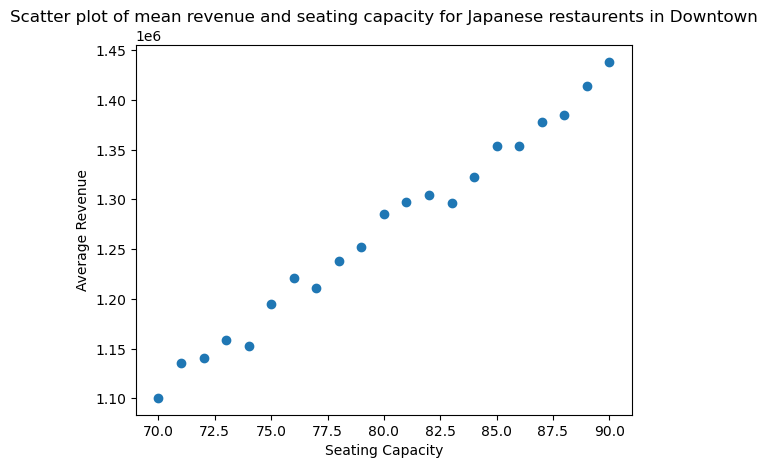

In [21]:
X = dowtown_jp_seat_revenue['Seating Capacity']
Y = dowtown_jp_seat_revenue['Average Revenue']

plt.scatter(X, Y)
plt.xlabel('Seating Capacity')
plt.ylabel('Average Revenue')
plt.title('Scatter plot of mean revenue and seating capacity for Japanese restaurents in Downtown')
plt.show()

In [7]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

S_xy = np.sum((X - mean_x) * (Y - mean_y))
S_xx = np.sum((X - mean_x) ** 2)
SS_T = np.sum((Y - mean_y) ** 2)

r = S_xy / np.sqrt(S_xx * SS_T)
print(f"Correlation coefficient (R): {r}")

Correlation coefficient (R): 0.9940058737134031


Slope: 15861.35084468383
Intercept: -635.3655898922589


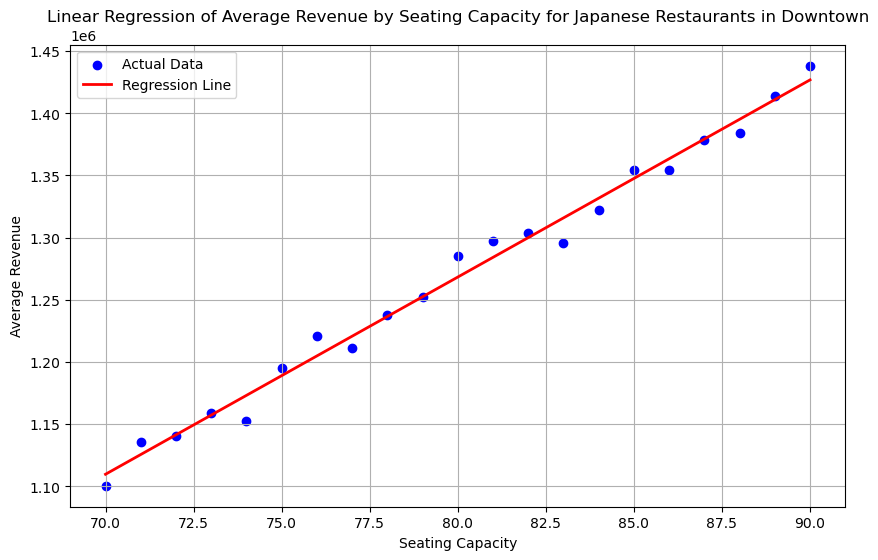

In [20]:
Slope = S_xy / S_xx
Intercept = mean_y - Slope*mean_x
print(f"Slope: {Slope}")
print(f"Intercept: {Intercept}")

Y_pred = [Slope * xi + Intercept for xi in X]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression of Average Revenue by Seating Capacity for Japanese Restaurants in Downtown')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
TEST = dowtown_jp_seat_revenue
TEST['Predicted Revenue'] = Slope * TEST['Seating Capacity'] + Intercept
TEST['Error'] = abs(TEST['Average Revenue'] - TEST['Predicted Revenue'])
TEST['Percentage Error'] = TEST['Error'] / TEST['Average Revenue'] * 100
TEST.sort_values('Percentage Error', ascending = False)

,Seating Capacity,Average Revenue,Predicted Revenue,Error,Percentage Error
4,74,1.152597e+06,1.173105e+06,20507.260806,1.779222
13,83,1.296072e+06,1.315857e+06,19784.575045,1.526503
10,80,1.285592e+06,1.268273e+06,17319.032301,1.347164
6,76,1.220667e+06,1.204827e+06,15839.805098,1.297635
11,81,1.297258e+06,1.284134e+06,13124.390504,1.011702
1,71,1.135511e+06,1.125521e+06,9990.933617,0.879862
0,70,1.100440e+06,1.109659e+06,9219.418538,0.837794
7,77,1.211071e+06,1.220689e+06,9618.011723,0.794174
20,90,1.438274e+06,1.426886e+06,11388.132200,0.791791
18,88,1.384550e+06,1.395164e+06,10613.242953,0.766548


In [11]:
avg_error = TEST['Percentage Error'].mean()
print("Average percentage error: ", avg_error)

Average percentage error:  0.6861213506894777


In [10]:
predict_revenue = Slope * 120 + Intercept
print("Predicted revenue for seating capacity of 120: ", predict_revenue)

Predicted revenue for seating capacity of 120:  1902726.7357721673
